In [104]:
import matplotlib.pyplot as plt 
import pandas as pd
from pathlib import Path
import numpy as np
import random 
import os 
import shutil


In [105]:
path = Path().absolute() # gemini helped since i have never really used pathlib before, self explanatory tho
original_data_path = path/"original_data"
train_data_path = original_data_path/"train"/"train"
test_data_path = original_data_path/"test"/"test"
train_data_path

WindowsPath('c:/Users/Noah7/code/Github/AI-Noah-Eliasson-OPA23/lab2/original_data/train/train')

In [106]:
train_image_list = list(train_data_path.iterdir())
images = random.sample(train_image_list, 10)  # i have create a list of all the paths and this now randomly samples 10 paths from that list and stores it in images


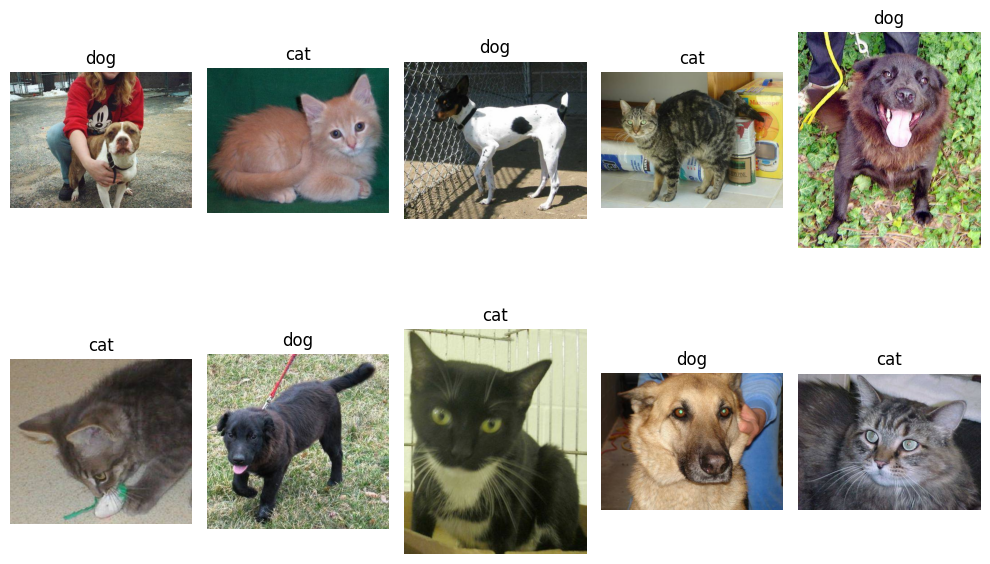

In [107]:
fig, axes= plt.subplots(2, 5, figsize= (10,7))       
for i, ax in enumerate(axes.flatten()):
    image_path = os.path.join(train_data_path, images[i])
    image = plt.imread(image_path)       
    ax.imshow(image)                    
    filename = os.path.basename(image_path)  # Get filename from path
    ax.set_title(filename[:3])
    ax.axis("off")

fig.tight_layout()  

In [109]:
import os
import random
import shutil

def move_files(source_data_path, dest_data_path, no_of_files ):
    source = source_data_path 
    dest = dest_data_path 

    files = os.listdir(source)
    num_files = no_of_files  

    for file_name in random.sample(files, num_files): # using random.sample ensures that we get entries from files, wihtout replacment
        shutil.move(os.path.join(source, file_name), dest)

In [167]:
ex_small_data = path/"experiment_small_data"
ex_small_test = ex_small_data/"test"
ex_small_train = ex_small_data/"train"
ex_small_val = ex_small_data/"val"

ex_tiny_data = path/"experiment_tiny_data"
ex_tiny_test = ex_tiny_data/"test"
ex_tiny_train = ex_tiny_data/"train"
ex_tiny_val = ex_tiny_data/"val"


In [121]:
# move_files(train_data_path, ex_small_train, 1600) dont run it twice...
move_files(test_data_path, ex_small_test, 500)
move_files(train_data_path, ex_small_val, 400)

move_files(train_data_path, ex_tiny_train, 160)
move_files(test_data_path, ex_tiny_test, 50)
move_files(train_data_path, ex_tiny_val, 40)


In [168]:
def count_files_test(path):

  count = 0
  for entry in os.scandir(path):
    if entry.is_file():
      count += 1
  return count

# count_files_test(ex_small_train), count_files_test(ex_small_test), count_files_test(ex_small_val)
# count_files_test(ex_tiny_train), count_files_test(ex_tiny_test), count_files_test(ex_tiny_val)
count_files_test(ex_tiny_train)

160

In [182]:
def data_image_label(data_path): 
    images = []  
    labels = []  

    for root, _, filenames in os.walk(data_path):
        # Iterate over files in current directory.
        for filename in filenames:
            label = 0 if "dog" in filename.lower() else 1
            image_path = os.path.join(root, filename) # Construct full path to image.
            
            image = cv2.imread(image_path) # Read image from file.
            if image is not None: # If image is successfully loaded.
                images.append(image) # Append image to list.
                labels.append(label) # Append corresponding label to list.
            else:
                print(f"Error loading image: {image_path}") 

    # Return list of images and corresponding labels.
    return images, np.array(labels)

images, labels = data_image_label(ex_small_train)

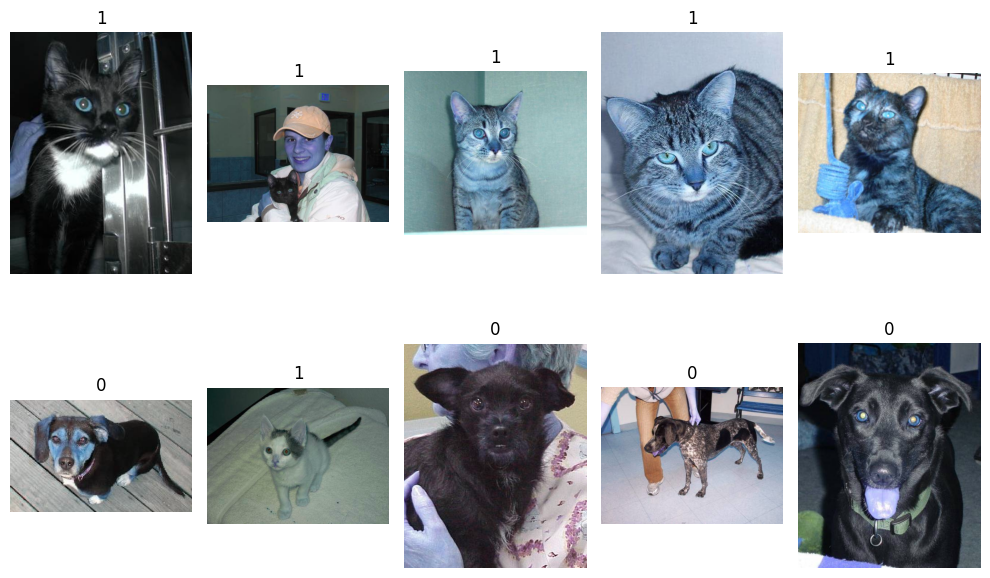

In [176]:
fig, axes= plt.subplots(2, 5, figsize= (10,7))       
random_indices = random.sample(range(len(images)), 10)
for i, ax in enumerate(axes.flatten()):
    index = random_indices[i]
    ax.imshow(images[index])     # since imread expects a path file..               
    ax.set_title(labels[index])
    ax.axis("off")

fig.tight_layout()  

<BarContainer object of 3 artists>

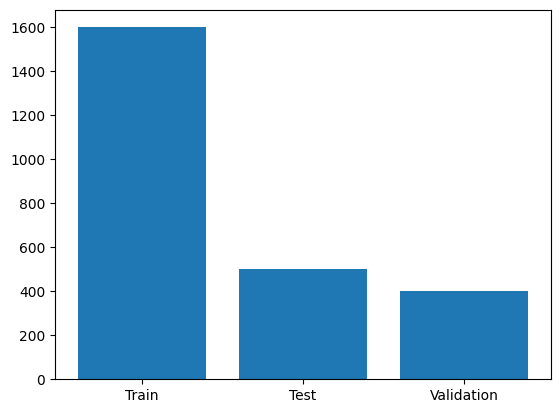

In [179]:
exp_train, exp_test, exp_val = count_files_test(ex_small_train), count_files_test(ex_small_test), count_files_test(ex_small_val)

categories = ["Train", "Test", "Validation"]
counts = [exp_train, exp_test, exp_val]

plt.bar(categories, counts)

splitting

In [183]:
X_train, y_train = data_image_label(ex_small_train)
X_test, y_test = data_image_label(ex_small_test)
X_val, y_val = data_image_label(ex_small_val)


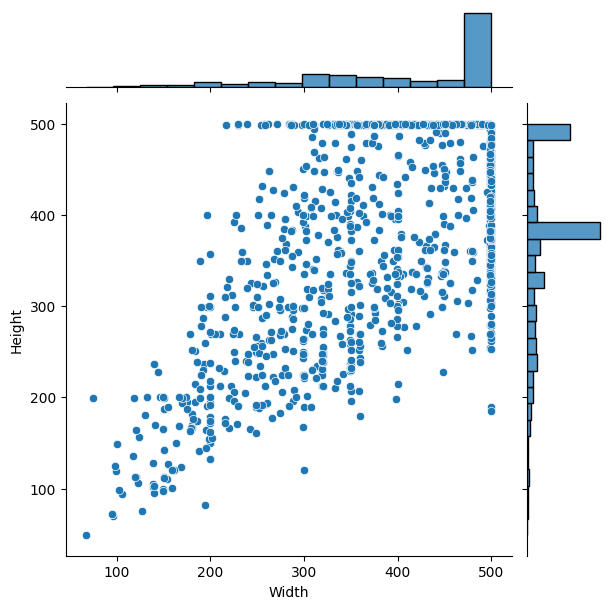

In [194]:
import seaborn as sns
 
def get_image_sizes(data_path): # basically the same function from above where we create list for images_sizes instead and then take the shape ignore the rgb channel and append width and height to ime_sizes 
    image_sizes = []
    for filename in os.listdir(data_path):
        image_path = os.path.join(data_path, filename) # this os function joins the data_path and filename strings ttoghether to create the full path to the specific file
        if os.path.isfile(image_path):
            image = cv2.imread(image_path)
            if image is not None:
                height, width, _ = image.shape
                image_sizes.append((width, height))
    return image_sizes


train_image_sizes = get_image_sizes(ex_small_train)

# Convert list of tuples to separate lists for width and height had help since i could not figure this part out. 
widths, heights = zip(*train_image_sizes)

# Create a jointplot
sns.jointplot(x=widths, y=heights, kind="scatter")
plt.xlabel("Width")
plt.ylabel("Height")
plt.show()